In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np 

In [8]:
with open('nfl_subs.txt','r') as f:
    subs = [s.strip() for s in f.readlines()]
with open('nfl_flairs.txt','r') as f:
    flairs = [fl.strip() for fl in f.readlines()]
with open('nfl_inits.txt','r') as f:
    inits = [i.strip() for i in f.readlines()]
with open('playoff_teams.txt','r') as f:
    pteams = [i.strip() for i in f.readlines()]
pteams = pd.DataFrame(dict(subreddit = pteams))
df = pd.DataFrame(dict(subreddit=subs, flair=flairs, inits=inits))
teams=df
team2abbrev = dict(zip(teams.subreddit,teams.inits))
flair2team = dict(zip(teams.flair, teams.subreddit))

In [18]:
# Formatting preamble

params = {
        # latex
        'text.usetex': False,
        # fonts
        'font.family': 'serif', 

        # figure and axes
        'figure.figsize': (14,7),
        'figure.titlesize': 35, 
        'axes.grid': False, 
        'axes.titlesize':20,
        #'axes.labelweight': 'bold', 
        'axes.labelsize': 20,

        # tick markers
        'xtick.direction': 'in', 
        'ytick.direction': 'in', 
        'xtick.labelsize': 24,
        'ytick.labelsize': 24, 
        'xtick.major.size': 10.0,
        'ytick.major.size': 10.0,
        'xtick.minor.size': 3.0,
        'ytick.minor.size': 3.0,

        # legend
        'legend.fontsize': 20,
        'legend.frameon': False,
        #'legend.framealpha':1.0,

        # colors
        'image.cmap': 'viridis',

        # saving figures
        'savefig.dpi': 300
        }

plt.rcParams.update(params)
plt.rcParams['font.serif'] = ['Computer Modern', 'Times New Roman']
plt.rcParams['font.family'] = ['serif', 'STIXGeneral']
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
plt.rcParams.update({'font.size': 32})

/home/chase/anaconda3/envs/second_gen/lib/python3.6/site-packages/ipykernel_launcher.py:43: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.


# Summary plot for incoming/outgoing volume by team

regular


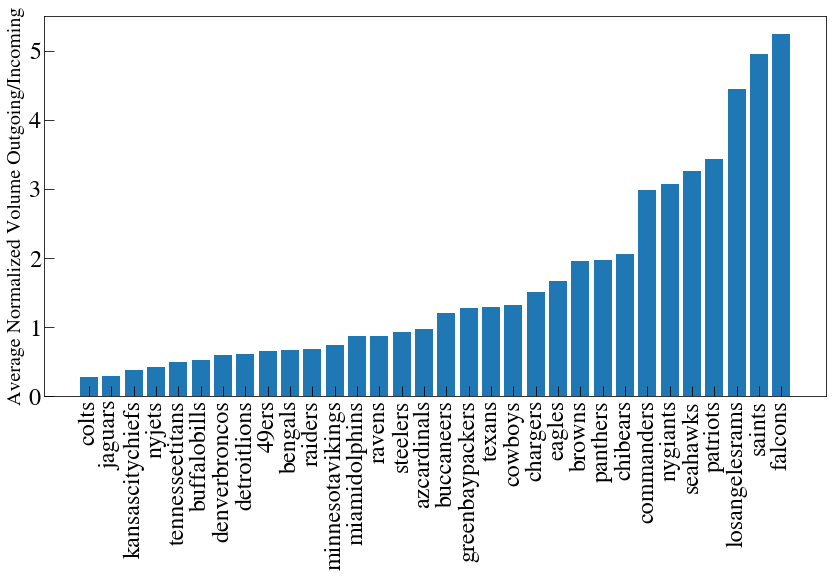

In [19]:
for version in ['regular']:
    df = pd.read_csv('summary_stats_in_{}.csv'.format(version))
    print(version)

    df['sent_outself'] = (df.out_sent-df.self_sent)/df.self_sent
    df['weight_outin'] = df.out_weight/df.in_weight
    df['sent_inself'] = (df.in_sent-df.self_sent)/df.self_sent
    x = df.sort_values('weight_outin')
    plt.bar(x.team.values,x.weight_outin[x.index.values])
    plt.xticks(rotation=90)
    plt.ylabel('Average Normalized Volume Outgoing/Incoming')
    plt.show()

# Mean incoming sentiment by team

regular


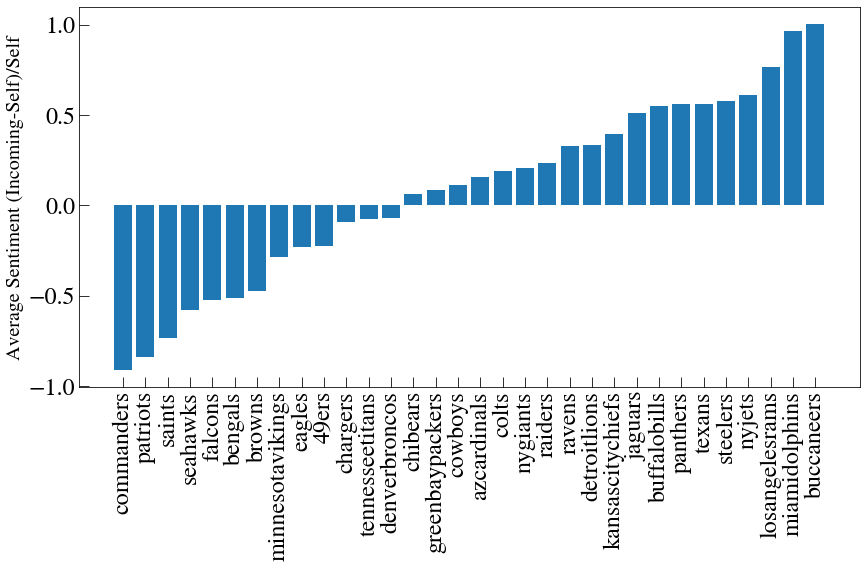

In [20]:
for version in ['regular']:
    df = pd.read_csv('summary_stats_in_{}.csv'.format(version))
    print(version)

    df['sent_outself'] = df.out_sent-df.self_sent
    df['weight_outin'] = df.out_weight/df.in_weight
    df['sent_inself'] = (df.in_sent-df.self_sent)/df.self_sent
    x = df.sort_values('sent_inself')
    plt.bar(x.team.values,x.sent_inself[x.index.values])
    plt.xticks(rotation=90)
    plt.ylabel('Average Sentiment (Incoming-Self)/Self')
    plt.show()

# Mean outgoing sentiment by team

regular


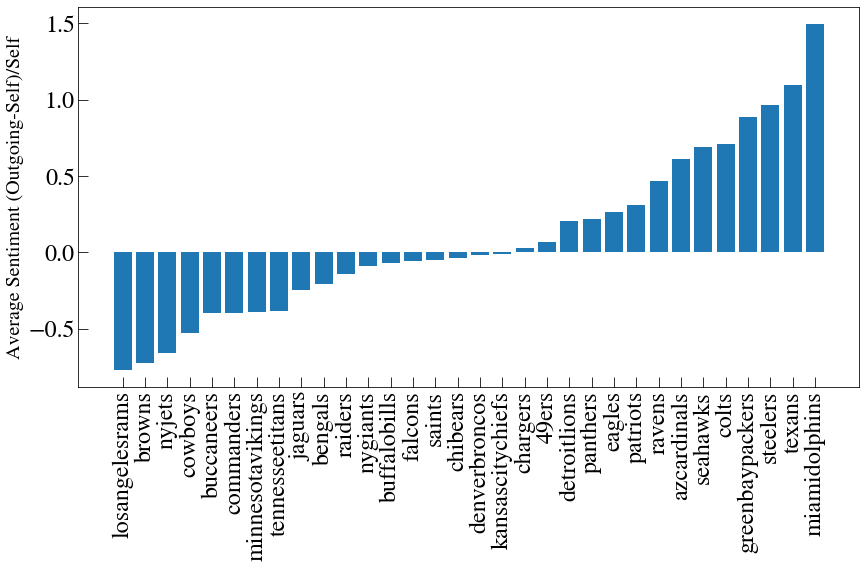

In [21]:
for version in ['regular']:
    df = pd.read_csv('summary_stats_in_{}.csv'.format(version))
    print(version)

    df['sent_outself'] = (df.out_sent-df.self_sent)/df.self_sent
    df['weight_outin'] = df.out_weight/df.in_weight
    df['sent_inself'] = (df.in_sent-df.self_sent)/df.self_sent
    x = df.sort_values('sent_outself')
    plt.bar(x.team.values,x.sent_outself[x.index.values])
    plt.xticks(rotation=90)
    plt.ylabel('Average Sentiment (Outgoing-Self)/Self')
    plt.show()


# Mean internal sentiment by team over time

eagles


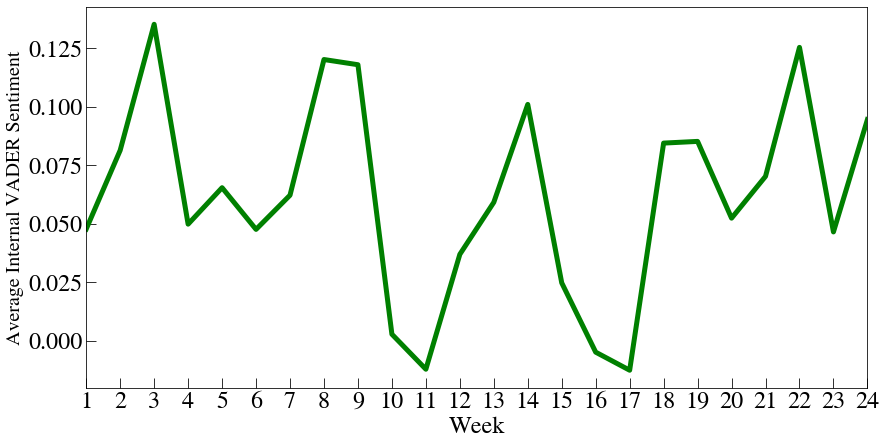

In [22]:
for team in teams.subreddit.values:
    if team != 'eagles': continue # Example: Eagles
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(111)
    print(team)
    stat = []
    selfstat = []
    for week in range(1,25):
        df = pd.read_csv('summary_stats_{}.csv'.format(week))
        ibuff = np.where(df.team==team)[0][0]

        stat.append(df.iloc[ibuff].in_sent)
        selfstat.append(df.iloc[ibuff].self_sent)

        
    #plt.plot(range(1,25), stat, lw=5, label = 'Incoming')
    ax.plot(range(1,25), selfstat, lw=5, color= 'g')

    ax.set_xticks(range(25))
    ax.set_xlim(1,24)
    ax.set_ylabel('Average Internal VADER Sentiment')
    ax.set_xlabel('Week',fontsize=24)

    plt.show()


# /r/buffalobills incoming volume & sentiment over time

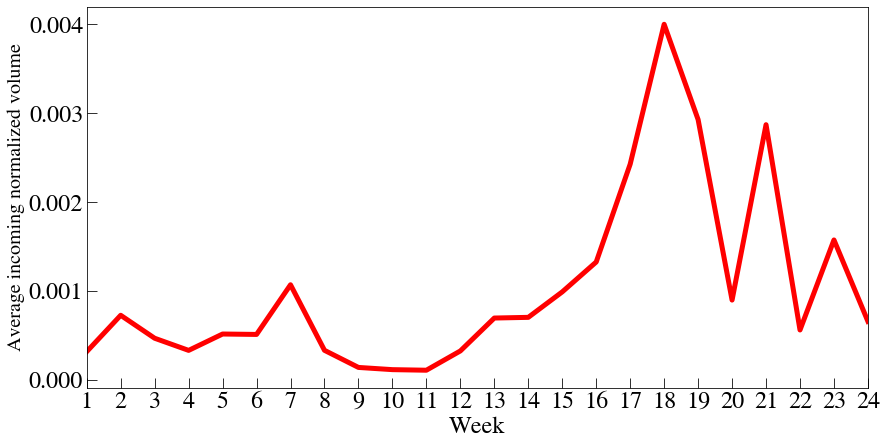

In [23]:
stat = []
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1)
for week in range(1,25):
    df = pd.read_csv('summary_stats_{}.csv'.format(week))
    ibuff = np.where(df.team=='buffalobills')[0][0]
    
    stat.append(df.iloc[ibuff].out_weight)

ax.plot(range(1,25), stat, lw=5, color='red')
ax.set_xticks(range(25))
ax.set_xlim(1,24)
ax.set_ylabel('Average incoming normalized volume')
ax.set_xlabel('Week',fontsize=24)
plt.show()

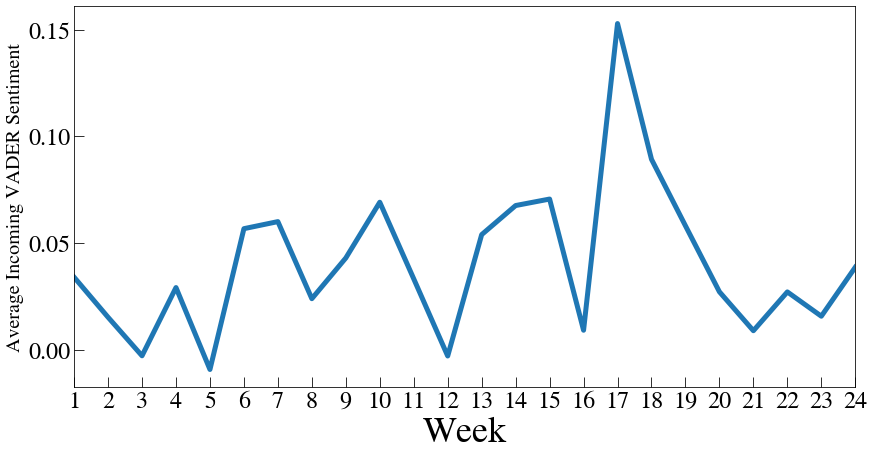

In [24]:

stat = []
selfstat = []
team='buffalobills'
stat = []
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1)
for week in range(1,25):
    df = pd.read_csv('summary_stats_{}.csv'.format(week))
    ibuff = np.where(df.team==team)[0][0]

    stat.append(df.iloc[ibuff].in_sent)
    selfstat.append(df.iloc[ibuff].self_sent)


ax.plot(range(1,25), stat, lw=5)
#plt.plot(range(1,25), selfstat, lw=5, color= 'b')

ax.set_xticks(range(25))
ax.set_xlim(1,24)
ax.set_ylabel('Average Incoming VADER Sentiment')
ax.set_xlabel('Week',fontsize=36)
plt.savefig('BillsSentiment.png'.format(team))

plt.show()